# Import Library

In [1]:
# mengimport library
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
cmap = plt.get_cmap('Spectral') #mengimpor warna gradasi

# Data Crime in London 2008-2016

In [2]:
# membaca data yang akan digunakan
df_london_crime = pd.read_csv('london_crime_by_lsoa.csv')

In [3]:
# mengetahui banyaknya data yang diperoleh
df_london_crime.shape

(13490604, 7)

In [4]:
#mengidentifikasi informasi yang diperlukan
(df_london_crime.head())

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [5]:
df_london_crime.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [6]:
df_london_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [7]:
#Diketahui diawal bahwa ukuran data crime sebesar (13490604, 7)
#Beberapa memiliki nilai yang unik
# Data yang unik mempermudah untuk analisa data
# Banyaknya unik value pada kolom sebagai berikut:
df_london_crime.describe(include = 'O').transpose()

,count,unique,top,freq
lsoa_code,13490604,4835,E01003689,3456
borough,13490604,33,Croydon,602100
major_category,13490604,9,Theft and Handling,3966300
minor_category,13490604,32,Common Assault,522180


In [8]:
df_london_crime.describe(exclude = 'O').transpose()

,count,mean,std,min,25%,50%,75%,max
value,13490604.0,0.477944,1.771513,0.0,0.00,0.0,1.00,309.0
year,13490604.0,2012.000000,2.581989,2008.0,2010.00,2012.0,2014.00,2016.0
month,13490604.0,6.500000,3.452053,1.0,3.75,6.5,9.25,12.0


In [9]:
#Untuk mengetahui apakah ada data yang kosong
df_london_crime.isnull().any()


lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool

# Total crime in London

In [10]:
#mengekstrak data untuk total kejahatan per tahun
year = df_london_crime['year'].unique()
sum_year = df_london_crime.groupby('year').sum()
sums=sum_year['value'].to_numpy()

n = len(year)
for i in range(n):
    for j in range (0, n-i-1):
        if year[j]>year[j+1]:
            year[j], year[j+1] = year[j+1], year[j]
            sums[j], sums[j+1] = sums[j+1], sums[j]

print(year)
print(sums)

[2008 2009 2010 2011 2012 2013 2014 2015 2016]
[715324 736121 737329 711624 724915 686407 680183 717214 738641]


In [11]:
df_london_crime_year=pd.DataFrame({
    "Year": year,
    "Total Crime": sums
})
df_london_crime_year.set_index('Year', inplace=True)
df_london_crime_year

,Total Crime
Year,
2008,715324
2009,736121
2010,737329
2011,711624
2012,724915
2013,686407
2014,680183
2015,717214
2016,738641


In [12]:
df_london_crime_year.min()

Total Crime    680183
dtype: int64

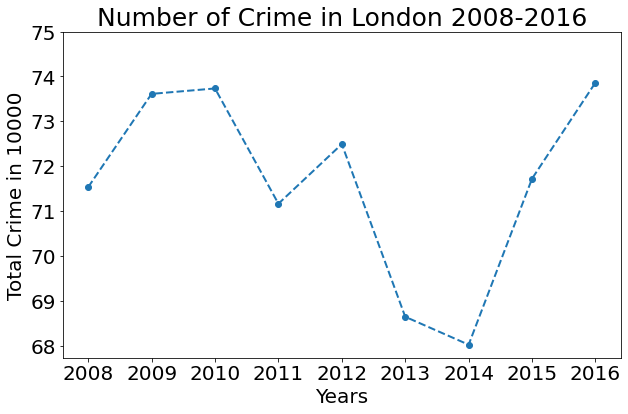

In [13]:
#plotting
df_london_crime_year.plot(marker='o', ls='dashed', lw=2,legend=None, figsize=(10,6))
#modifikasi plot
plt.xlabel('Years', size=20)
plt.ylabel('Total Crime in 10000', size=20)
plt.title('Number of Crime in London 2008-2016', size=25)
plt.xticks(size=20)
#modifikasi sumbu y
values=np.arange(68, 76 , 1)
values_incerment=10000
plt.yticks(values*values_incerment,['%d' %val for val in values], size=20)
plt.show()

# Percentage of Major Category

In [14]:
#mengekstrak data yang dibutuhkan yaitu major_category dan jumlah totalnya
df_crime_major_category=pd.DataFrame(df_london_crime.groupby(['major_category']).size())
df_crime_major_category.rename(columns={0:"Total"}, inplace=True) #mengubah nama kolom
df_crime_major_category

,Total
major_category,
Burglary,1043604
Criminal Damage,2069172
Drugs,1179468
Fraud or Forgery,236520
Other Notifiable Offences,776304
Robbery,939384
Sexual Offences,108108
Theft and Handling,3966300
Violence Against the Person,3171744


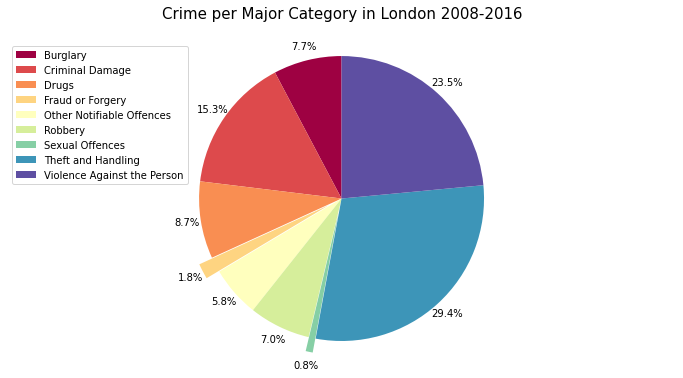

In [15]:
colors = [cmap(i) for i in np.linspace(0, 1, 9)] #mendata warna yang akan digunakan
explode_list=[0,0,0,0.1,0,0,0.1,0,0] #mendata pie yang akan diperbesar supaya mudah dibaca
df_crime_major_category['Total'].plot(kind='pie', figsize=(12,6), autopct='%1.1f%%', startangle=90, colors=colors,labels=None, pctdistance=1.1, explode=explode_list)
plt.title('Crime per Major Category in London 2008-2016', y=1.05, size=15)
plt.axis('equal')
plt.legend(labels=df_crime_major_category.index, loc='upper left')
plt.ylabel(None)#menghilangkan y label
plt.show()

# Histogram of Minor Category

In [16]:
df_crime_minor_category=pd.DataFrame(df_london_crime.groupby(['minor_category']).size())
df_crime_minor_category.rename(columns={0:"Total"}, inplace=True) #mengubah nama kolom
df_crime_minor_category

,Total
minor_category,
Assault with Injury,521856
Burglary in Other Buildings,522072
Burglary in a Dwelling,521532
Business Property,418716
Common Assault,522180
Counted per Victim,137916
Criminal Damage To Dwelling,521424
Criminal Damage To Motor Vehicle,521964
Criminal Damage To Other Building,503928


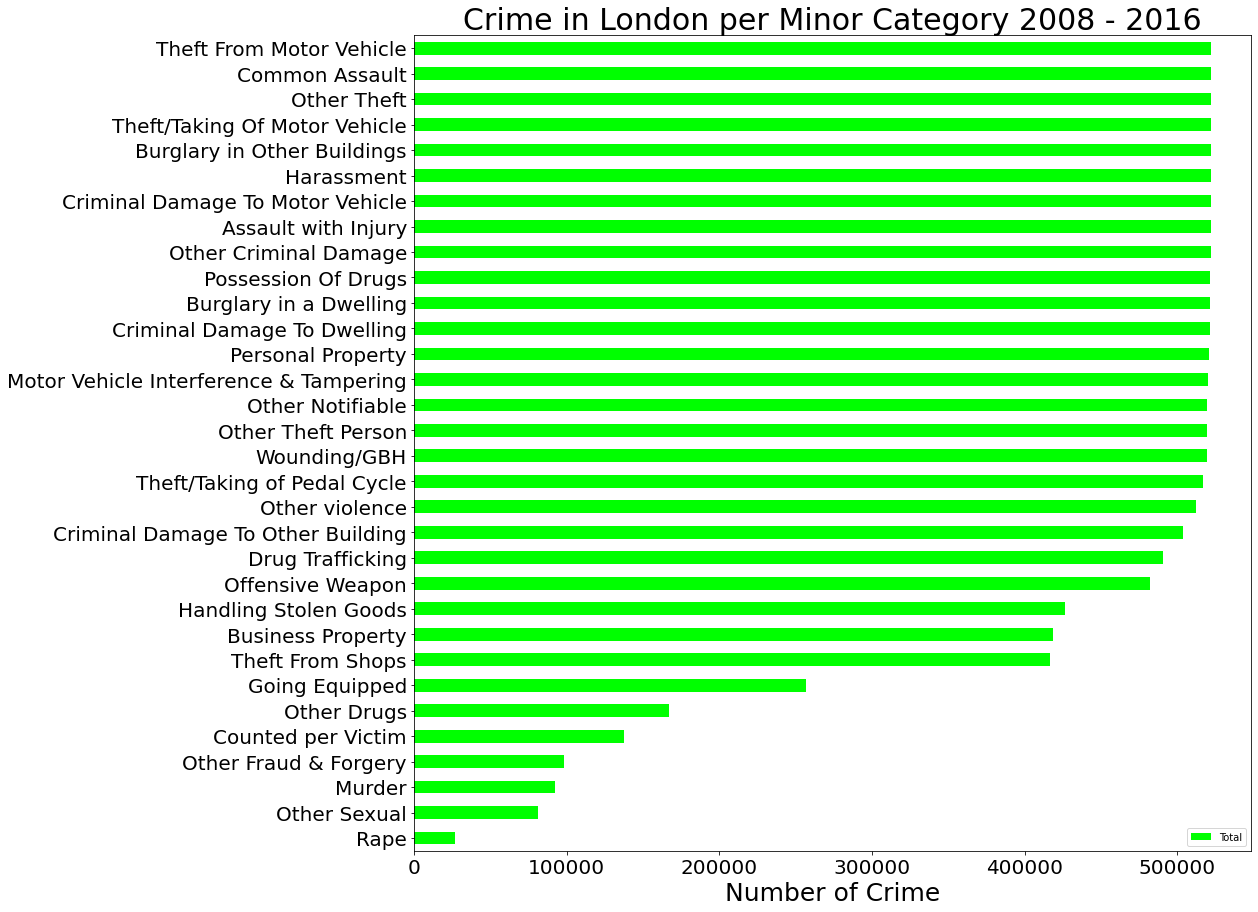

In [17]:
df_crime_minor_category.sort_values(by='Total', ascending=True, inplace=True)
df_crime_minor_category.plot(kind='barh',figsize=(15,15), color='Lime')
plt.xlabel('Number of Crime', size=25)
plt.title('Crime in London per Minor Category 2008 - 2016', size=30)
plt.ylabel(None)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Crime in each month

In [26]:
year2008=df_london_crime.loc[df_london_crime['year']==2008]
months2008=year2008['month'].unique()
months2008.sort()
sum_month2008=year2008.groupby(['month']).sum()
months2008_val=sum_month2008['value'].to_numpy()
months2008_val

array([65419, 62626, 61343, 59640, 62587, 62290, 64126, 59959, 58414,
       63354, 61395, 57488])

In [ ]:
year2008=df_london_crime.loc[df_london_crime['year']==2016]
months2008=year2008['month'].unique()
months2008.sort()
sum_month2008=year2008.groupby(['month']).sum()
months2008_val=sum_month2008['value'].to_numpy()
months2008_val

In [49]:
months=pd.Series(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
df_crime_per_month=pd.DataFrame({'month':months, '2008':months2008_val})
df_crime_per_month.set_index('month', inplace=True)
df_crime_per_month

,2008
month,
Jan,65419
Feb,62626
Mar,61343
Apr,59640
May,62587
Jun,62290
Jul,64126
Aug,59959
Sep,58414
